Found 7195 files in ../data/Stocks
Found 1344 files in ../data/ETFs

--- Stock Data Sample (first 2 rows) ---
Stock: iba
              open    high     low   close  volume  openint
date                                                       
2005-02-25  12.868  12.982  12.834  12.834   15928        0
2005-02-28  13.536  13.536  13.273  13.281   16382        0


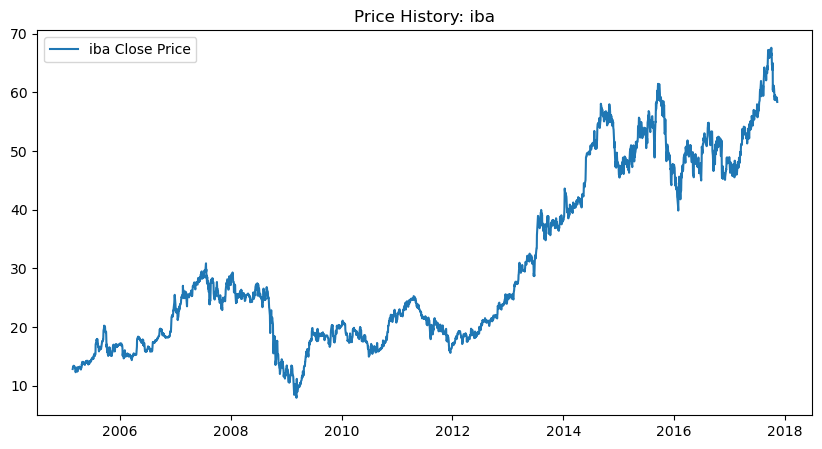

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# 1. Setup Paths
# We go up one level from 'notebooks' to get to 'data'
DATA_PATH_STOCKS = '../data/Stocks'
DATA_PATH_ETFS = '../data/ETFs'

def load_data(folder_path, limit=5):
    """
    Loads a limited number of files for testing.
    Returns a dictionary of DataFrames.
    """
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    data_dict = {}
    
    print(f"Found {len(files)} files in {folder_path}")
    
    for file in files[:limit]: # Limit to 5 for now to save memory
        file_name = os.path.basename(file).split('.')[0]
        # Your files look like CSVs inside TXT. Usually they have Date,Open,High,Low,Close,Volume
        df = pd.read_csv(file, sep=',') 
        
        # Standardize column names just in case
        df.columns = [c.lower() for c in df.columns]
        
        # Convert Date column to datetime
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
            df.set_index('date', inplace=True)
            
        data_dict[file_name] = df
        
    return data_dict

# 2. Load Sample Data
stocks = load_data(DATA_PATH_STOCKS, limit=5)
etfs = load_data(DATA_PATH_ETFS, limit=5)

# 3. Quick Check
print("\n--- Stock Data Sample (first 2 rows) ---")
first_stock = list(stocks.keys())[0]
print(f"Stock: {first_stock}")
print(stocks[first_stock].head(2))

# 4. Visualization (To verify data looks correct)
plt.figure(figsize=(10, 5))
plt.plot(stocks[first_stock]['close'], label=f'{first_stock} Close Price')
plt.title(f"Price History: {first_stock}")
plt.legend()
plt.show()